The goal of this project is to watermark images to prevent unwanted image reproduction. We will do this using OpenCV to add the logo and the text as a watermark.

In this notebook, we will:
1. Load images and logos from URL
2. Resize the images
3. Convert the images into RGB format and then convert them into numpy arrays
4. Store the height and width of the image and logo
5. Find the coordinates of the center of the image
6. Find the region of interest to draw the logo
7. Merge the logo with the image and visualize it
8. Create the text watermark
9. Use CV2 function to define text properties and apply it at specific coordinates
10. Convert the image into RGB format and visualize it

Import relevant libraries.

In [1]:
import numpy as np
import cv2
import requests
from PIL import Image

Read the image from the URL.

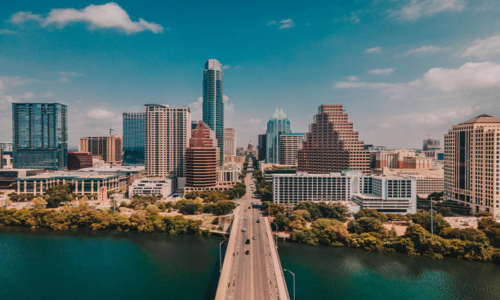

In [2]:
image = Image.open(requests.get('https://media.istockphoto.com/photos/austin-congress-street-bridge-and-texas-capitol-building-picture-id1289215387?k=20&m=1289215387&s=612x612&w=0&h=k-z-FUKqCkHES-k89IAmAQMqXIdaOBsTZV7DenSWM-c=', stream = True).raw)
image_logow = image.resize((500, 300))
image_textw = image.resize((500, 300))
image_logow

Read in the logo url. It is important for the logo to have small pixel images. Bigger pixel dimensions cause an error with OpenCV.

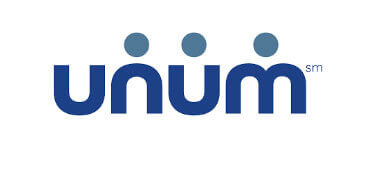

In [7]:
logo = Image.open(requests.get('https://thetrainingassociates.com/wp-content/uploads/2017/03/cs-unum.jpg', stream=True).raw)
logo

Convert these images into RBG format and then into a numpy array. Then extract shape (ie. height and width).

In [4]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

Calculate where the center of the image is. This is where we will place the watermark.

In [5]:
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

Find the Region of Interest (the area where we need to place the watermark on). Then we can use OpenCV to merge the logo on the Region of Interest. We can also add a line of pattern on our image.

In [6]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]

# Add the logo to the ROI
result = cv2.addWeighted(roi, 1, logo, 1, 0)

# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)

# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

Plot the logo watermark image.

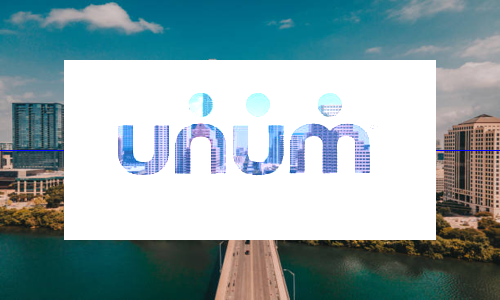

In [8]:
img = Image.fromarray(image_logow, 'RGB')
img

Now we will use text as a watermark.

In [32]:
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text = 'Photo Proof', org=(w_image - 130, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.6,
            color = (0, 0, 255), thickness = 2, lineType = cv2.LINE_4)

array([[[  0,  98, 127],
        [  0,  98, 127],
        [  0,  98, 127],
        ...,
        [108, 138, 148],
        [109, 139, 149],
        [109, 139, 149]],

       [[  0,  98, 127],
        [  0,  98, 127],
        [  0,  98, 127],
        ...,
        [109, 139, 149],
        [109, 139, 149],
        [110, 140, 150]],

       [[  0,  99, 128],
        [  0,  99, 128],
        [  0,  99, 128],
        ...,
        [109, 139, 149],
        [110, 140, 150],
        [110, 140, 150]],

       ...,

       [[  2,  61,  59],
        [  3,  62,  60],
        [  3,  62,  60],
        ...,
        [ 63,  59,  47],
        [ 71,  67,  55],
        [ 62,  58,  46]],

       [[  0,  57,  55],
        [  1,  60,  58],
        [  2,  61,  59],
        ...,
        [ 59,  60,  46],
        [ 63,  63,  49],
        [ 58,  58,  45]],

       [[  0,  57,  55],
        [  1,  60,  58],
        [  2,  61,  59],
        ...,
        [ 60,  61,  47],
        [ 64,  65,  51],
        [ 60,  61,  47]]

Plot the text watermark image.

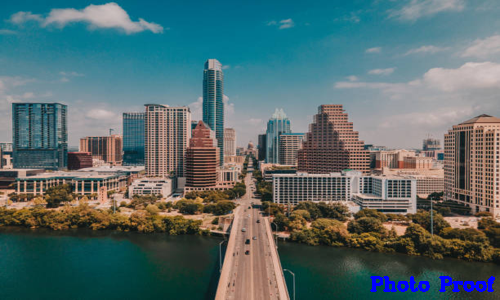

In [33]:
timg = Image.fromarray(image_text, 'RGB')
timg